# Examen DataScience 

* Je maakt het examen op je eigen laptop, en rekent daar alles uit.
* Je mag het internet op, maar je mag **niet communiceren**. Het plaatsen van je antwoorden ergens is natuurlijk ook verboden.
* Je levert dit notebook met jouw antwoorden op de juiste plek in via Blackboards assignments, met de naam GlobalLanguageNetwork.

* Veel succes! 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

# 1

Read the spreadsheet on `http://language.media.mit.edu/data/public/unesco_langlang_20120722_iso639-3.txt` directly in in pandas in a dataframe called `raw`, and show the first 5 lines of the dataframe `raw`.

* this must be done in 2 lines

In [3]:
raw= pd.read_csv('http://language.media.mit.edu/data/public/unesco_langlang_20120722_iso639-3.txt', sep='\t')
raw.head() 

,original_language,target_language,num_translations
0,abk,aze,1
1,abk,bul,1
2,abk,deu,1
3,abk,eng,2
4,abk,est,2


# 2 
We zijn natuurlijk in de Nederlandse taal geinterreseerd. Die heeft code `nld`.

1. Hoeveel regels zijn er in `raw` met `nld` in de kolom `original_language`
2. En hoeveel in de kolom `target_language`
3. Naar welke taal zijn er de meeste vertalingen vanuit het Nederlands?  Geef een one liner die de top 5 laat zien. Je laat alleen de kolommen `['target_language','num_translations']` zien, en eventueel de index kolom.
4. Maak een plotje met op de x-as de namen van talen omgekeerd geordend op het aantal vertalingen, en op de y-as hoe veel vertalingen er vanuit het Nederlands naar die taal is. Zorg dat de y-as in een log schaal geplot wordt.  
    * Je krijgt een wiebelige bijna rechte dalende curve. De x-as  begint met `deu`.

In [4]:
#1
len(raw[raw.original_language=='nld'])

68

In [5]:
#2
len(raw[raw.target_language=='nld'])

116

In [6]:
#3
raw[raw.original_language=='nld'].sort_values('num_translations', ascending=False)[['target_language','num_translations']].head()

,target_language,num_translations
4657,deu,6238
4666,fra,3304
4659,eng,2855
4703,spa,990
4656,dan,810


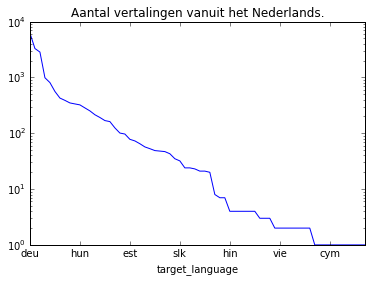

In [7]:
#4
ef = raw[raw.original_language=='nld'].sort_values('num_translations', ascending=False)[['target_language','num_translations']] 
ef.index= ef.target_language
ef.drop('target_language', axis=1)
ef.num_translations.plot(logy=True, title='Aantal vertalingen vanuit het Nederlands.');

# 3 

Bekijk eens de output van `spannend= raw.original_language.value_counts()`. Gebruik `?` om uit te vogelen wat `value_counts` eigenlijk doet.

1. Beschrijf, gebruikmakend van terminologie uit de theorie van sociale netwerken, wat `spannend` betekent.
2. Wat betekent `raw.target_language.value_counts()` dan?
3. Maak een pandas Series object genaamd `total_translations` (een Dataframe met maar 1 kolom) met de taalcode als index en met voor elke taal het totaal aantal vertalingen vanuit die taal als waarde. Sorteer weer omgekeerd. De top 5 ziet er dan als volgt uit:
```
eng    1225237
fra     216624
deu     201718
rus     101395
ita      66453
```
    1. Plot `total_translations` in loglog schaal. 
    2. Wat is de waarde in `total_translations` voor het Nederlands?

Bij   antwoorden op 3.1 en 3.2  **moet** het vetgedrukte woord er in voorkomen: zoniet 0 punten.

### 3.1

Dit geeft de __outdegree__ van elke taal weer: het aantal talen waarnaar die taal verwijst. 

### 3.2

Dit geeft de __indegree__ van elke taal weer: het aantal talen **dat** naar die taal verwijst.

In [8]:
#3 mogelijkheid 1
total_translations=raw.pivot_table(index='original_language', 
                                   values='num_translations', 
                                   aggfunc=sum).sort_values(ascending=False)

In [9]:
#3 mogelijkheid 2

total_translations2=raw.groupby(by= ['original_language']).sum().sort_values('num_translations', ascending=False)

In [10]:
print total_translations.head() 
print total_translations2.head() 

original_language
eng    1225237
fra     216624
deu     201718
rus     101395
ita      66453
Name: num_translations, dtype: int64
                   num_translations
original_language                  
eng                         1225237
fra                          216624
deu                          201718
rus                          101395
ita                           66453


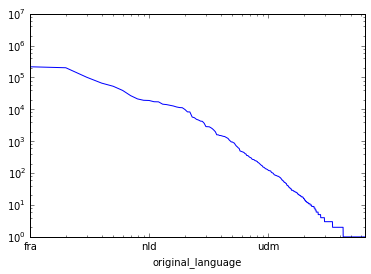

In [11]:
#3A
total_translations.plot(loglog=True);

In [12]:
#3B
total_translations['nld']

18978

# 4

1. Geef de mediaan en het gemiddelde van het aantal vertalingen.
2. Hoeveel taal-paren hebben meer vertalingen dan de mediaan?

In [13]:
#4.1
raw.num_translations.median(), raw.num_translations.mean()

(3.0, 323.1856356791196)

In [19]:
len(raw[raw.num_translations > raw.num_translations.median()])

3289